In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


캐글: https://www.kaggle.com/rhodiumbeng/classifying-multi-label-comments-0-9741-lb  
  


참고 자료 1 : https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda/#data  

참고 자료 2 : https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras

참고 자료 3 : https://paperswithcode.com/paper/spam-review-detection-with-graph#code


In [2]:
#In[1]

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [3]:
#ln[2]

#Load training and test data
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/21-1/jgsaw-toxic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/21-1/jgsaw-toxic/test.csv')

In [4]:
# In[3]

# Examine the data (EDA)

train_df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
42507,716e3ebcde2e6b27,Careful there - the combination of straw men a...,0,0,0,0,0,0
131959,c21cd05c09429af3,"""\n Thanks. ) And congrats on that election. )...",0,0,0,0,0,0
134516,cf4e145f47d03fd5,"Greek mythology \n\nOk, so what is this all ab...",0,0,0,0,0,0
106904,3bab3bd2ccbf329b,"The 1st link, if you search their episode guid...",0,0,0,0,0,0
121438,89c0058248ecfd13,"Zeno \n\nThe nature of motion, which Zeno and ...",0,0,0,0,0,0


In [5]:
# In[4]

cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [6]:
# In[5]

# check missing values in numeric columns
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# In[6]

unlabelled_in_all = train_df[(train_df['toxic']!=1) & (train_df['severe_toxic']!=1) & (train_df['obscene']!=1) & 
                            (train_df['threat']!=1) & (train_df['insult']!=1) & (train_df['identity_hate']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_df)*100)

Percentage of unlabelled comments is  89.83211235124176


In [8]:
# In[7]

# check for any 'null' comment
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [9]:
# In[8]

test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [10]:
# In[9]

no_comment = test_df[test_df['comment_text'].isnull()]
no_comment

,id,comment_text


In [11]:
# In[10]

# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 153164
Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


In [12]:
# In[11]

# Let's look at the character length for the rows in the training data and record these
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))

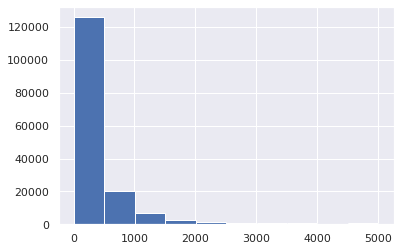

In [13]:
# In[12]

# look at the histogram plot for text length
sns.set()
train_df['char_length'].hist()
plt.show()

In [14]:
# In[13]

data = train_df[cols_target]

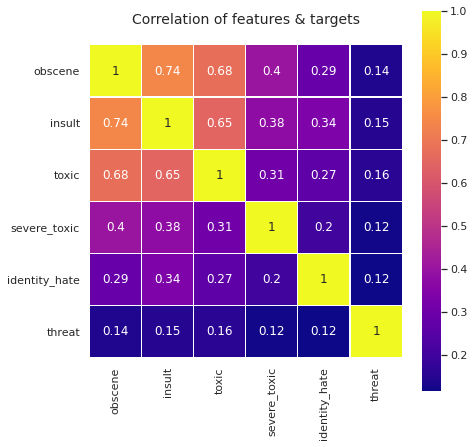

In [15]:
# In[14]

colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [16]:
# In[15]

test_df['char_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))

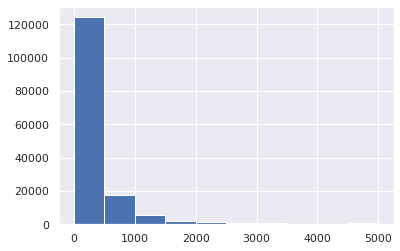

In [17]:
# In[16]

plt.figure()
plt.hist(test_df['char_length'])
plt.show()

In [18]:
# In[17]

#Clean up the comment text

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [19]:
# In[18]

# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))

In [20]:
# In[19]

# clean the comment_text in test_df [Thanks, Pulkit Jha.]
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))

In [21]:
# In[20]

train_df = train_df.drop('char_length',axis=1)

In [22]:
# In[21]

X = train_df.comment_text
test_X = test_df.comment_text

In [23]:
# In[22]

print(X.shape, test_X.shape)

(159571,) (153164,)


In [24]:
# In[23]

# Vectorize the data

# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [25]:
# In[24]

# learn the vocabulary in the training data, then use it to create a document-term matrix
X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178792 stored elements in Compressed Sparse Row format>

In [26]:
# In[25]

# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2618972 stored elements in Compressed Sparse Row format>

In [27]:
# In[26]

# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)

# create submission file
submission_binary = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/21-1/jgsaw-toxic/sample_submission.csv')

for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_binary[label] = test_y_prob

... Processing obscene


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9832049683213115
... Processing insult


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9755344016143285
... Processing toxic


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9639533499194716
... Processing severe_toxic


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9920474271640837
... Processing identity_hate


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9939776024465599
... Processing threat
Training accuracy is 0.9981199591404453


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
# In[27]

submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999957,0.460307,0.999964,0.050123,0.972258,0.425732
1,0000247867823ef7,0.002462,0.000442,0.000402,0.000324,0.003252,0.000411
2,00013b17ad220c46,0.010794,0.000117,0.003232,0.000035,0.007652,0.001264
3,00017563c3f7919a,0.001345,0.002150,0.000979,0.000117,0.000835,0.000034
4,00017695ad8997eb,0.019417,0.000811,0.001273,0.000602,0.003271,0.000569


In [29]:
# In[28]

# generate submission file
submission_binary.to_csv('submission_binary.csv',index=False)

In [30]:
# In[29]

# create submission file
submission_chains = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/21-1/jgsaw-toxic/sample_submission.csv')


# create a function to add features
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [31]:
# In[30]

for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm,y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training Accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    # make predictions from test_X
    test_y = logreg.predict(test_X_dtm)
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_chains[label] = test_y_prob
    # chain current label to X_dtm
    X_dtm = add_feature(X_dtm, y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    # chain current label predictions to test_X_dtm
    test_X_dtm = add_feature(test_X_dtm, test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

... Processing obscene


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9832049683213115
Shape of X_dtm is now (159571, 5001)
Shape of test_X_dtm is now (153164, 5001)
... Processing insult


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9818137380852411
Shape of X_dtm is now (159571, 5002)
Shape of test_X_dtm is now (153164, 5002)
... Processing toxic


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9675630283698166
Shape of X_dtm is now (159571, 5003)
Shape of test_X_dtm is now (153164, 5003)
... Processing severe_toxic


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9930626492282433
Shape of X_dtm is now (159571, 5004)
Shape of test_X_dtm is now (153164, 5004)
... Processing identity_hate


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9956195047972376
Shape of X_dtm is now (159571, 5005)
Shape of test_X_dtm is now (153164, 5005)
... Processing threat


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9985649021438733
Shape of X_dtm is now (159571, 5006)
Shape of test_X_dtm is now (153164, 5006)


In [32]:
# In[31]

submission_chains.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999970,4.168872e-01,0.999964,0.193270,0.893687,0.600495
1,0000247867823ef7,0.002696,7.459653e-10,0.000402,0.000072,0.003677,0.000136
2,00013b17ad220c46,0.008088,2.060120e-10,0.003232,0.000009,0.004084,0.000536
3,00017563c3f7919a,0.001138,1.124507e-08,0.000979,0.000063,0.000569,0.000004
4,00017695ad8997eb,0.019776,1.095576e-09,0.001273,0.000158,0.001547,0.000104


In [33]:
# In[32]

#generate submission file
submission_chains.to_csv('submission_chains.csv', index=False)

In [34]:
# In[33]

# create submission file
submission_combined = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/21-1/jgsaw-toxic/sample_submission.csv')

In [35]:
# In[34]

# corr_targets = ['obscene','insult','toxic']
for label in cols_target:
    submission_combined[label] = 0.5*(submission_chains[label]+submission_binary[label])

In [36]:
# In[35]

submission_combined.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999964,0.438597,0.999964,0.121697,0.932973,0.513114
1,0000247867823ef7,0.002579,0.000221,0.000402,0.000198,0.003465,0.000274
2,00013b17ad220c46,0.009441,0.000059,0.003232,0.000022,0.005868,0.000900
3,00017563c3f7919a,0.001241,0.001075,0.000979,0.000090,0.000702,0.000019
4,00017695ad8997eb,0.019597,0.000405,0.001273,0.000380,0.002409,0.000336


In [37]:
# In[36]

#generate submission file
submission_combined.to_csv('submission_combined.csv', index=False)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [38]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

In [39]:
sms_train = train_df
sms_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [40]:
sms_train['length'] = sms_train['comment_text'].apply(len)
sms_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0,103
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,228
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,600
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,61


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe80b9cc090>]],
      dtype=object)

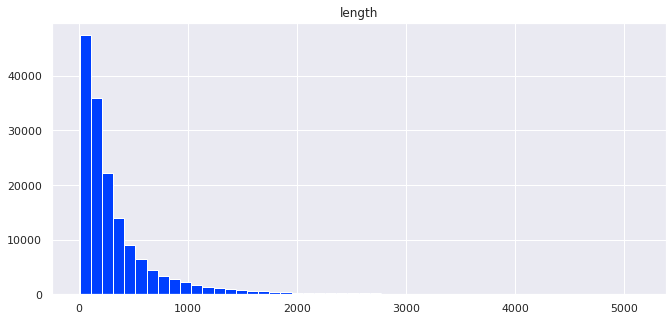

In [41]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
sms_train.hist(column='length', bins=50,figsize=(11,5))

In [42]:
text_feat_train = sms_train['comment_text'].copy()

In [43]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

밑에 셀 수정 하지 마...! 엄청 오래 걸려ㅠㅠ

In [46]:
text_feat_train = text_feat_train.apply(text_process)

위 셀은 시간 엄청 오래 걸리는데 어차피 pre-train 과정임!! 고치지 마!!!! 제발....!!!

In [47]:
vectorizer = TfidfVectorizer("english")

In [48]:
features_train = vectorizer.fit_transform(text_feat_train)

In [49]:
sms_test = test_df
sms_test['length'] = sms_test['comment_text'].apply(len)

text_feat_test = sms_test['comment_text'].copy()

In [50]:
text_feat_test = text_feat_test.apply(text_process) ##오래 걸림 : test

In [51]:
features_test = vectorizer.fit_transform(text_feat_test)

In [55]:
sms_test.head()

,id,comment_text,char_length,length
0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...,367,360
1,0000247867823ef7,from rfc the title is fine as it is imo,50,39
2,00013b17ad220c46,sources zawe ashton on lapland,54,30
3,00017563c3f7919a,if you have a look back at the source the info...,205,201
4,00017695ad8997eb,i do not anonymously edit articles at all,41,41


In [56]:
labels_train_toxic = sms_train['toxic']; labels_test = sms_test
labels_train_severe_toxic = sms_train['severe_toxic']
labels_train_obscene = sms_train['obscene']
labels_train_threat = sms_train['threat']
labels_train_insult = sms_train['insult']
labels_train_identity_hate = sms_train['identity_hate']

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [59]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [60]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

def predict_labels(clf, features):
    return (clf.predict(features))

In [61]:
labels_train = labels_train_toxic

In [62]:
#SVC
train_classifier(svc, features_train, labels_train)
#pred = predict_labels(svc, features_test)
#pred_scores.append(("SVC, [accuracy_score(labels_test, pred)]"))

ValueError: ignored

In [ ]:
pred = predict_labels(svc, features_train)

In [ ]:
pred_scores.append(("SVC, [accuracy_score(labels_test, pred)]"))